In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [104]:
! pip install openpyxl

Прочитать отдельные листы и сохранить в отдельные переменные

In [105]:
Data_Parsing = pd.read_excel("C:\IDE\SkillFactory\PY_14_Очистка данных\Valentino\Data_TSUM.xlsx", sheet_name='Data_Parsing')
Data_Company = pd.read_excel("C:\IDE\SkillFactory\PY_14_Очистка данных\Valentino\Data_TSUM.xlsx", sheet_name='Data_Company')

In [106]:
Data_Parsing.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


In [107]:
Data_Company.head()

,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [108]:
Data_Parsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           75 non-null     object
 1   Category        75 non-null     object
 2   producer_id     75 non-null     object
 3   producer_color  75 non-null     object
 4   price           75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [109]:
def cleaner_df(colum):
    if type(colum) is not int:
        for simbol in ['_', '-', '~', '\\', '/']:
            colum = colum.replace(simbol, '')
    return colum


for col in Data_Parsing.columns:
    Data_Parsing[col] = Data_Parsing[col].apply(cleaner_df)

Переименовать столбцы
df.rename(columns = {'producer_id':'item_id', 'producer_color':'color_id'}, inplace = True )

In [110]:
Data_Parsing.rename(columns = {'producer_id':'item_id', 'producer_color':'color_id'}, inplace = True )

In [111]:
Data_Parsing.tail()

,brand,Category,item_id,color_id,price
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256
74,Stone Island,Bags,sssss111135,red,205


In [112]:

Data_Company2=Data_Company.copy()
Data_Company.tail()


,brand,Category,item_id,color_id,current price
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222
74,Stone Island,Bags,sssss111135,red,275


In [113]:
Data_Company3=Data_Company2[['item_id','current price']]

In [114]:
Data_Company3.tail()

,item_id,current price
70,sssss111131,165
71,sssss111132,196
72,sssss111133,236
73,sssss111134,222
74,sssss111135,275


In [115]:
Data_Parsing=Data_Parsing.merge(Data_Company3,on = 'item_id', how='inner')
Data_Parsing.tail()

,brand,Category,item_id,color_id,price,current price
70,Stone Island,Bags,sssss111131,red,164,165
71,Stone Island,Bags,sssss111132,red,158,196
72,Stone Island,Bags,sssss111133,red,194,236
73,Stone Island,Bags,sssss111134,red,256,222
74,Stone Island,Bags,sssss111135,red,205,275


In [116]:
Data_Parsing['dif_%']=round((Data_Parsing['price']/Data_Parsing['current price']*100)-100)

In [117]:
Data_Parsing.head()

,brand,Category,item_id,color_id,price,current price,dif_%
0,Valentino,Shoes,aaaaa111111,black,167,247,-32.0
1,Valentino,Shoes,aaaaa111112,black,188,161,17.0
2,Valentino,Shoes,aaaaa111113,black,184,234,-21.0
3,Valentino,Shoes,aaaaa111114,black,196,167,17.0
4,Valentino,Shoes,aaaaa111115,black,250,153,63.0


In [118]:
Data_Parsing.isnull().sum()

brand            0
Category         0
item_id          0
color_id         0
price            0
current price    0
dif_%            0
dtype: int64

C:\Users\DS\AppData\Local\Temp\ipykernel_10360\3450875378.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  histplot.legend()


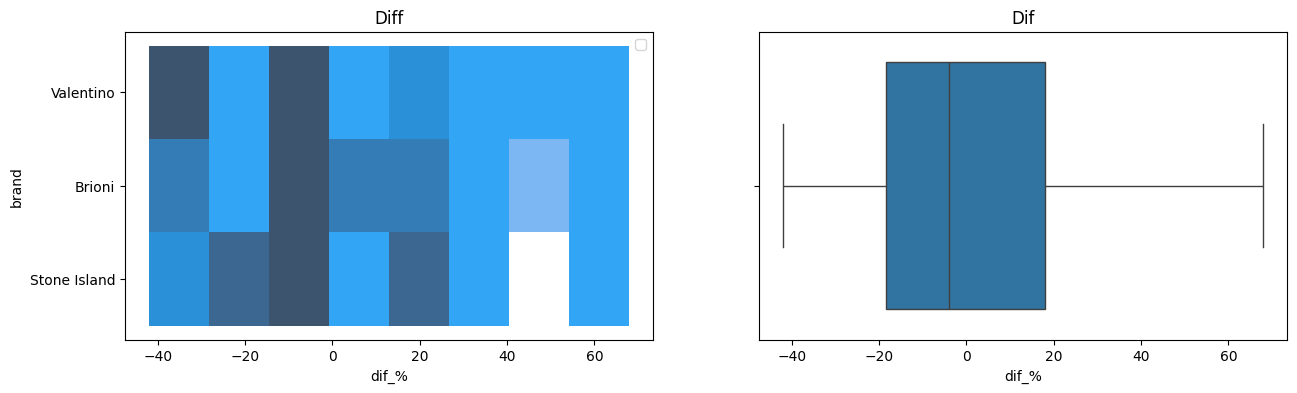

In [138]:
data = Data_Parsing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='dif_%', y='brand', ax=axes[0]);
histplot.set_title('Diff');
histplot.legend()
boxplot = sns.boxplot(data=data, x='dif_%', ax=axes[1]);
boxplot.set_title('Dif');

Число выбросов по методу Тьюки: 0
Результирующее число записей: 75


In [141]:
def outliers_z_score_mod(data, feature, left=7, right=6, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(data,'dif_%', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 0


In [161]:
import numpy as np

def outliers_z_score_mod(data, feature, left=1, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(data,'dif_%', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 7
Результирующее число записей: 28


In [155]:

Data_Parsing.to_excel (r'C:\Users\DS\Desktop\обучалка\111.xlsx')